In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('/content/Dataset_Results-METNai (1).xlsx')

In [5]:
df.head()

,No,Date,Time,Batt,Slr_kW_Avg,Slr_MJ_Tot,SlrkW_Avg,SlrkJ_Tot,PAR_Den_Avg,PAR_Tot_Tot,BP_kPa,AirTC_Avg,RH_Avg,Rain_mm_Tot,WS_ms_Avg,WindDir_Avg
0,1,2012-06-22,20:00:00,13.02,0,0.000052,0,0,-0.003,-0.000906,NAN,31.03,47.24,0,3.013,261.2
1,2,2012-06-22,20:15:00,13.05,0,0.000146,0,0,-0.003,-0.00248,NAN,30.8,48.12,0,2.982,259.8
2,3,2012-06-22,20:30:00,13.06,0,0.000134,0,0,-0.003,-0.002452,NAN,30.54,50.23,0,1.848,264.9
3,4,2012-06-22,20:45:00,13.06,0,0.00014,0,0,-0.003,-0.00248,NAN,30.54,51.22,0,1.416,259.8
4,5,2012-06-22,21:00:00,13.05,0,0.000128,0,0,-0.003,-0.002494,NAN,30.35,51.5,0,1.161,263.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591949 entries, 0 to 591948
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   No           591949 non-null  int64         
 1   Date         591949 non-null  datetime64[ns]
 2   Time         591949 non-null  object        
 3   Batt         311204 non-null  object        
 4   Slr_kW_Avg   311203 non-null  object        
 5   Slr_MJ_Tot   311204 non-null  object        
 6   SlrkW_Avg    245242 non-null  object        
 7   SlrkJ_Tot    245136 non-null  object        
 8   PAR_Den_Avg  311098 non-null  object        
 9   PAR_Tot_Tot  311205 non-null  object        
 10  BP_kPa       311202 non-null  object        
 11  AirTC_Avg    311203 non-null  object        
 12  RH_Avg       311203 non-null  object        
 13  Rain_mm_Tot  311203 non-null  object        
 14  WS_ms_Avg    311202 non-null  object        
 15  WindDir_Avg  311202 non-null  obje

In [7]:
df.shape

(591949, 16)

In [8]:
import missingno as msno

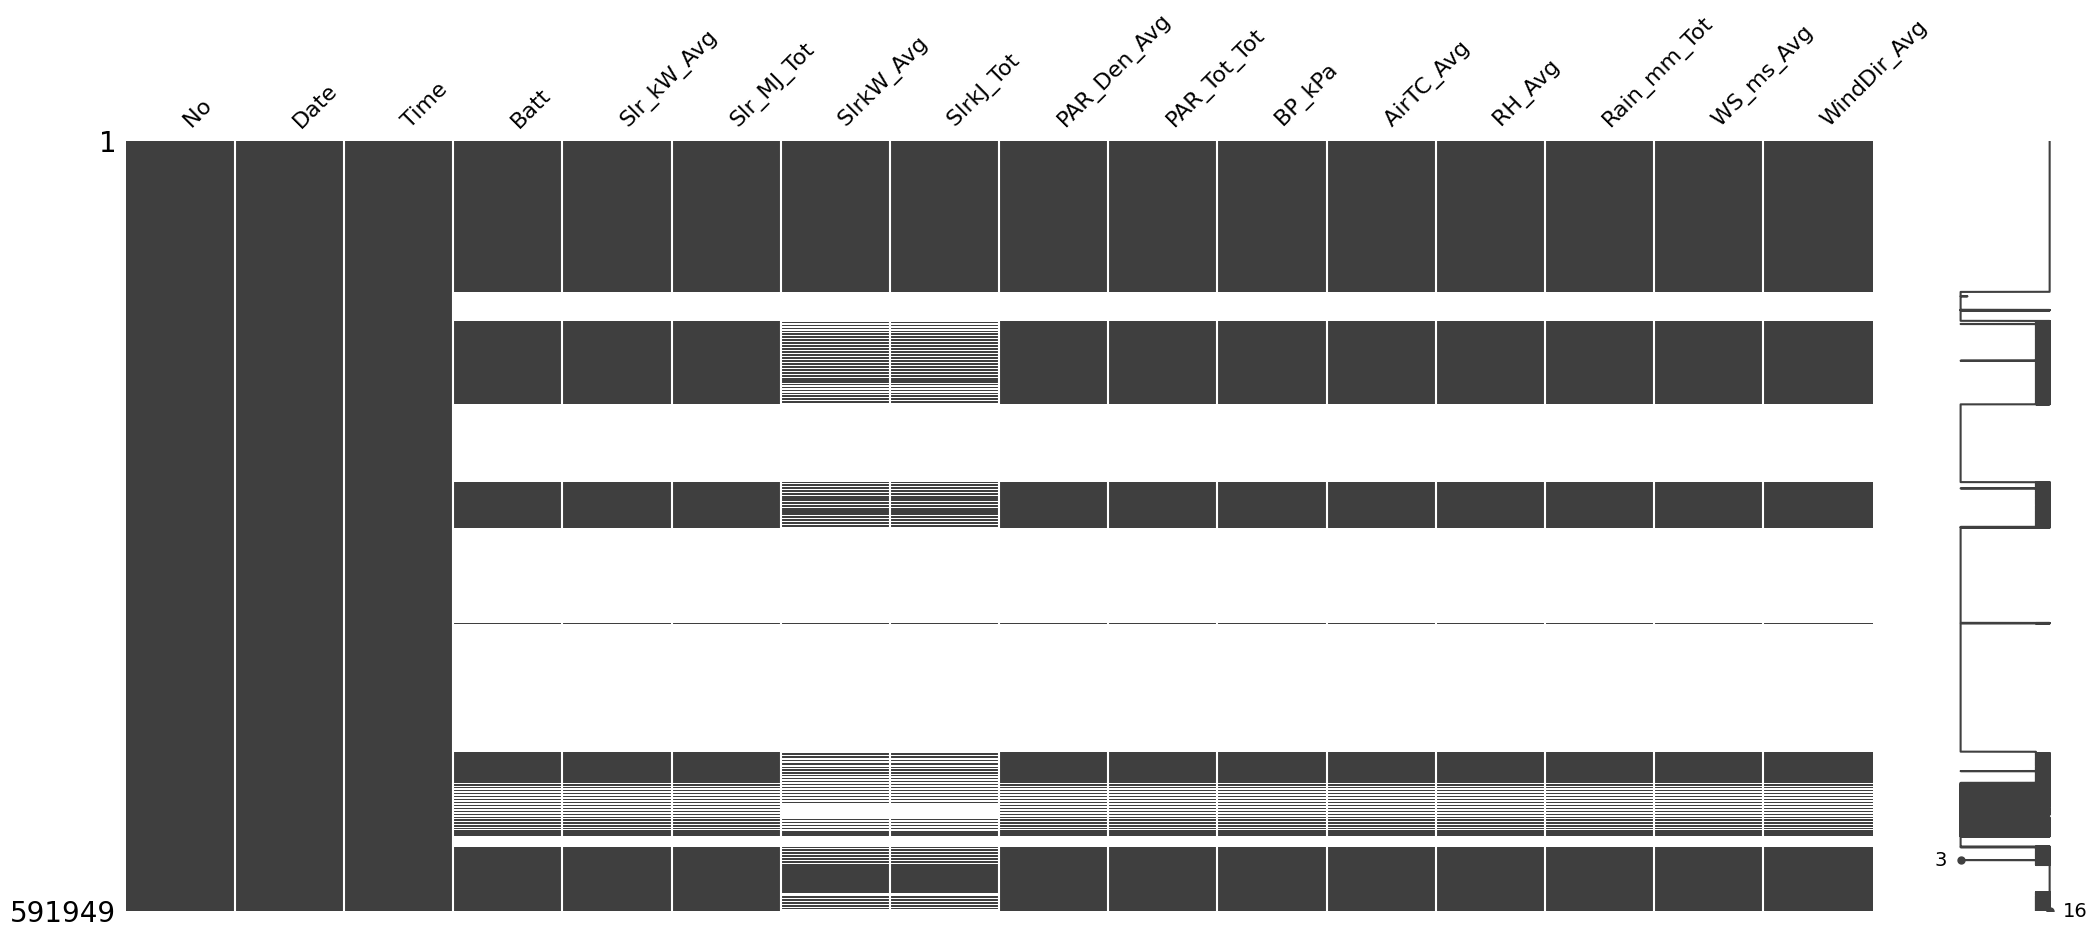

<Figure size 1500x900 with 0 Axes>

In [9]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

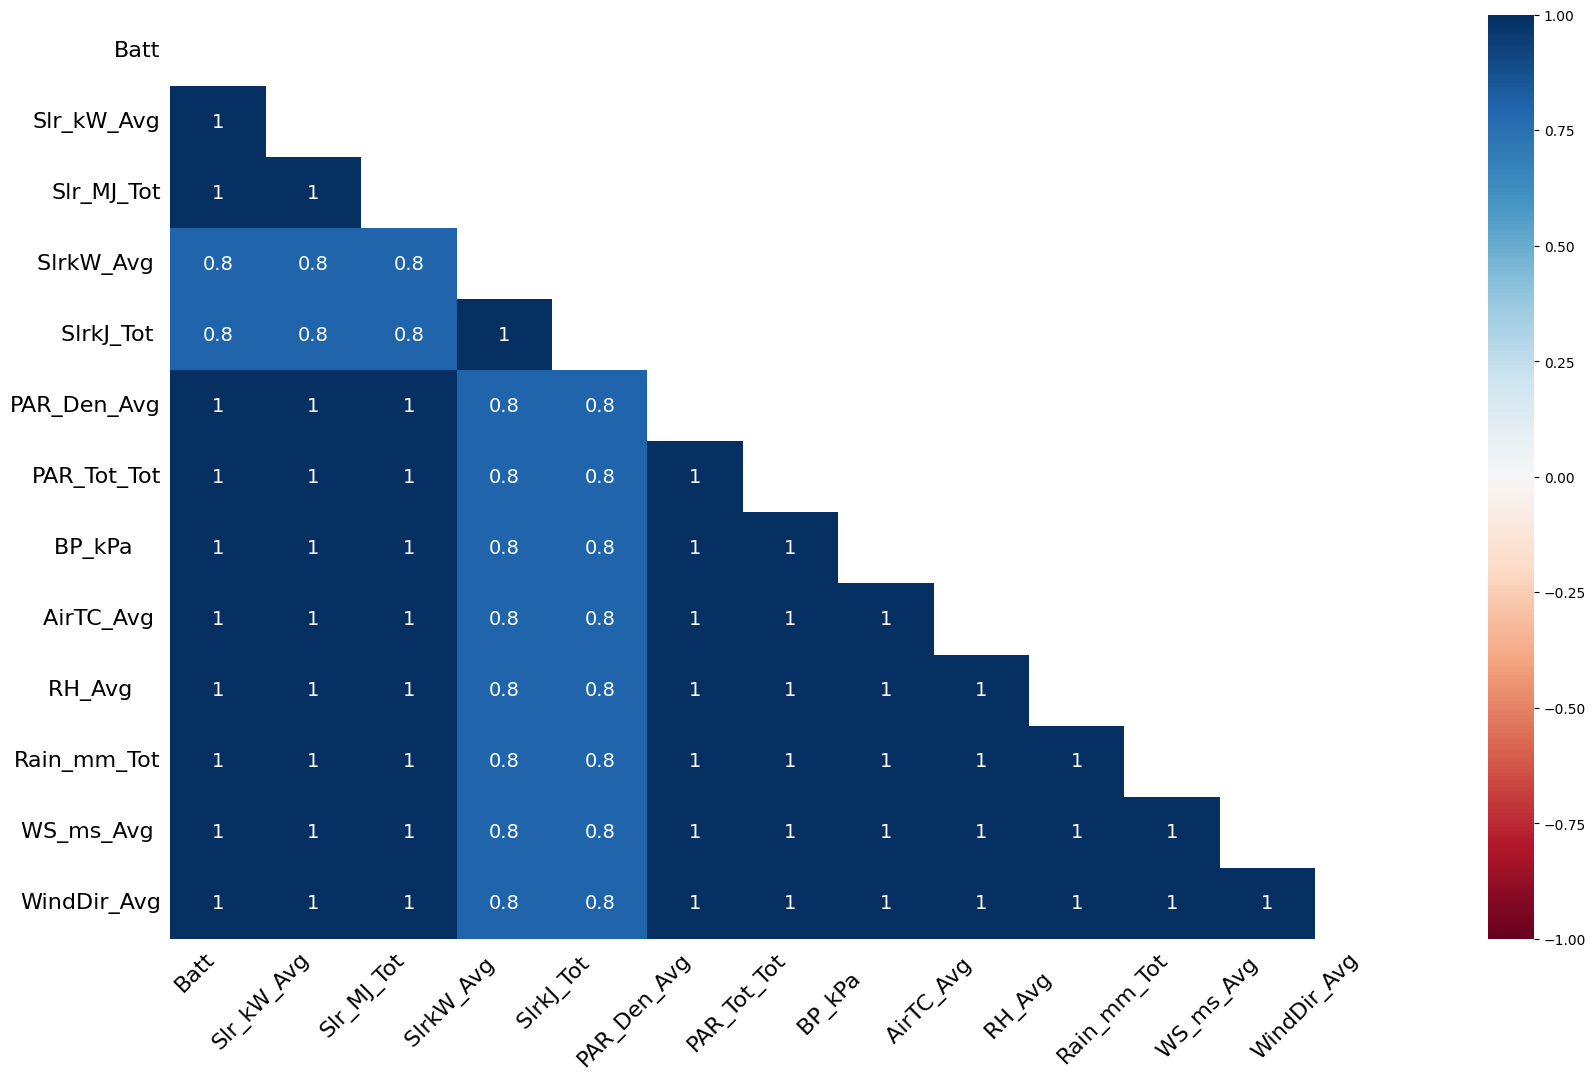

In [10]:
msno.heatmap(df, labels = True)


In [11]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['Batt',
 'Slr_kW_Avg',
 'Slr_MJ_Tot',
 'SlrkW_Avg ',
 'SlrkJ_Tot ',
 'PAR_Den_Avg',
 'PAR_Tot_Tot',
 'BP_kPa    ',
 'AirTC_Avg ',
 'RH_Avg    ',
 'Rain_mm_Tot',
 'WS_ms_Avg ',
 'WindDir_Avg']

<Axes: >

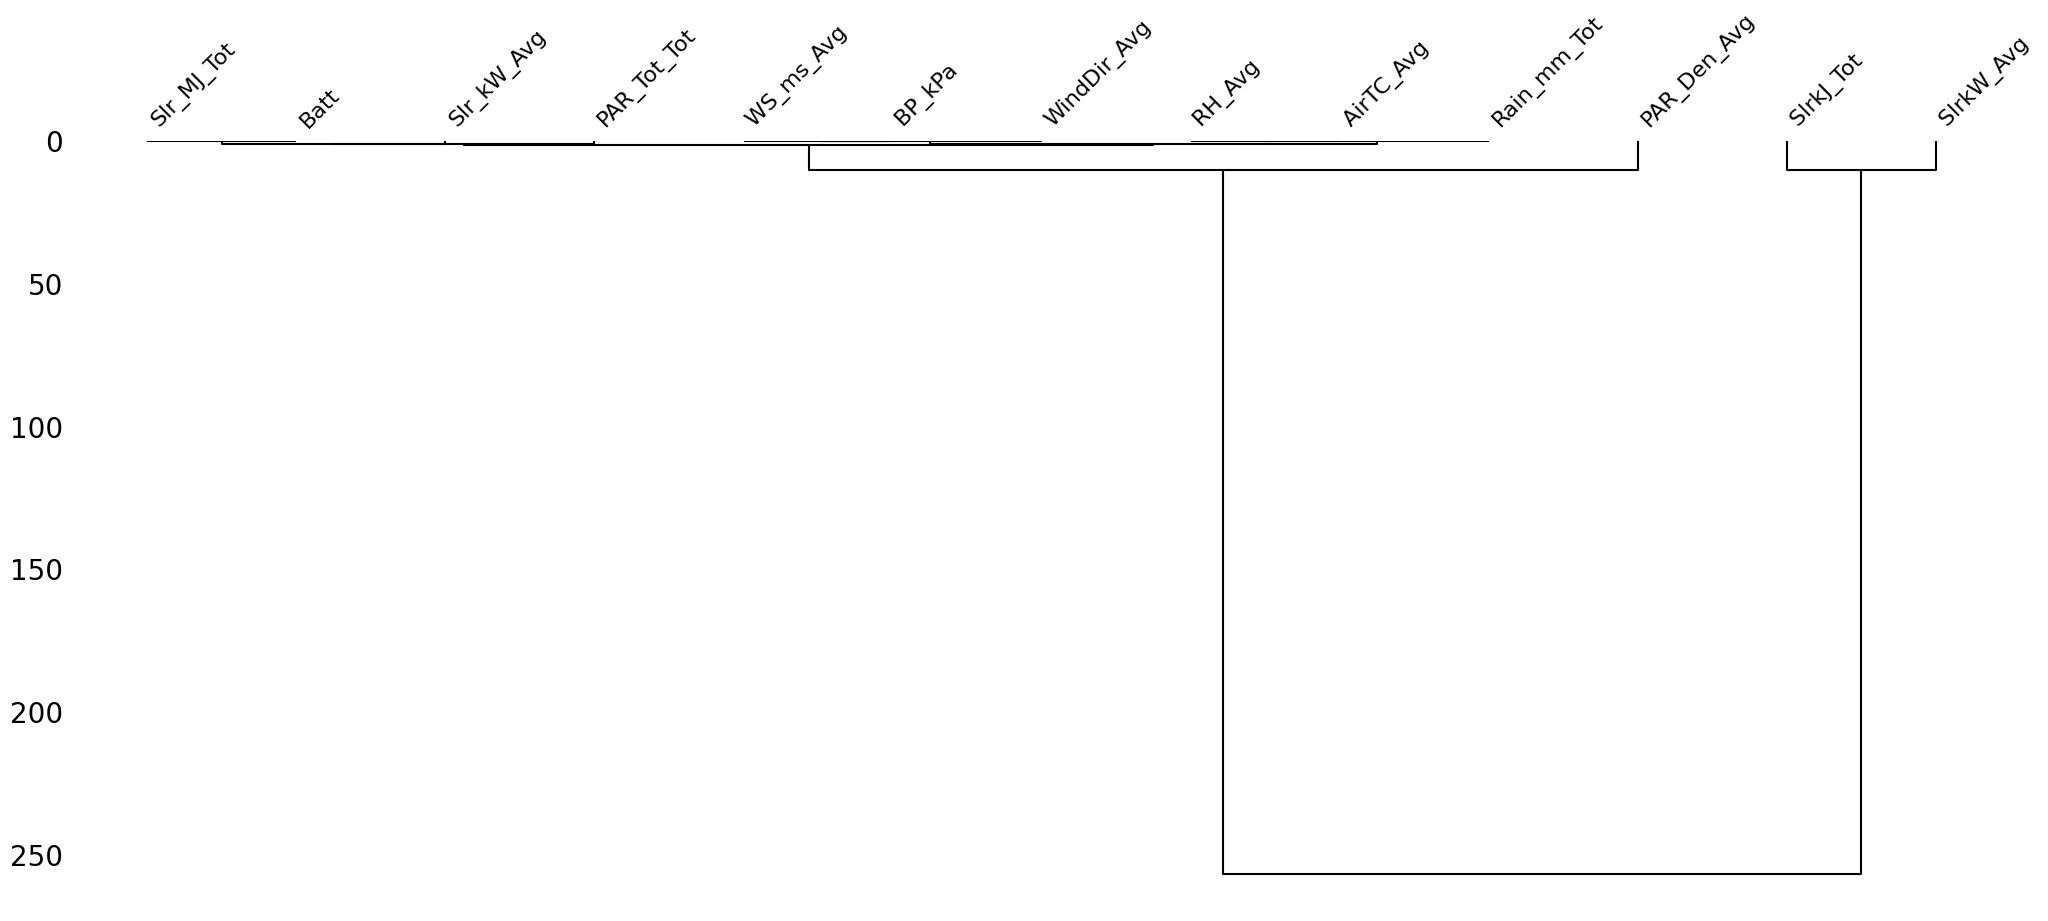

In [12]:
msno.dendrogram(df[missing_columns])

In [13]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [14]:
missing_percent = get_numerical_summary(df)

Batt : 280745 (47.427%)
Slr_kW_Avg : 280746 (47.427%)
Slr_MJ_Tot : 280745 (47.427%)
SlrkW_Avg  : 346707 (58.57%)
SlrkJ_Tot  : 346813 (58.588%)
PAR_Den_Avg : 280851 (47.445%)
PAR_Tot_Tot : 280744 (47.427%)
BP_kPa     : 280747 (47.428%)
AirTC_Avg  : 280746 (47.427%)
RH_Avg     : 280746 (47.427%)
Rain_mm_Tot : 280746 (47.427%)
WS_ms_Avg  : 280747 (47.428%)
WindDir_Avg : 280747 (47.428%)


In [15]:
df_temp = df.copy()

In [16]:
ATTRIBUTE_THRESHOLD = 25 #25% in this case

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df_temp.drop(col, axis = 1, inplace = True)

In [17]:
_ = get_numerical_summary(df_temp)

In [18]:
del df_temp

In [19]:
df_temp = df.copy()

In [21]:
SAMPLE_THRESHOLD = 5

print("Samples Before Removal : {}".format(df_temp.shape[0]))

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df_temp.shape[0]))


Samples Before Removal : 591949
Samples After Removal : 320022


In [23]:
del df_temp

In [24]:
cat_missing_cols = [col for col in missing_columns if df[col].dtype == 'object']
cat_missing_cols

['Batt',
 'Slr_kW_Avg',
 'Slr_MJ_Tot',
 'SlrkW_Avg ',
 'SlrkJ_Tot ',
 'PAR_Den_Avg',
 'PAR_Tot_Tot',
 'BP_kPa    ',
 'AirTC_Avg ',
 'RH_Avg    ',
 'Rain_mm_Tot',
 'WS_ms_Avg ',
 'WindDir_Avg']

In [34]:
df['Batt'].value_counts()

,count
Batt,
NAN,34166
12.96,4116
12.95,4105
12.98,3986
12.97,3886
...,...
11.11,1
11.13,1
9.1,1


In [35]:
df[cat_missing_cols] = df[cat_missing_cols].fillna('Missing')
df.Batt.value_counts()

,count
Batt,
Missing,280745
NAN,34166
12.96,4116
12.95,4105
12.98,3986
...,...
14.43,1
11.03,1
10.74,1


In [36]:
df[cat_missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591949 entries, 0 to 591948
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Batt         591949 non-null  object
 1   Slr_kW_Avg   591949 non-null  object
 2   Slr_MJ_Tot   591949 non-null  object
 3   SlrkW_Avg    591949 non-null  object
 4   SlrkJ_Tot    591949 non-null  object
 5   PAR_Den_Avg  591949 non-null  object
 6   PAR_Tot_Tot  591949 non-null  object
 7   BP_kPa       591949 non-null  object
 8   AirTC_Avg    591949 non-null  object
 9   RH_Avg       591949 non-null  object
 10  Rain_mm_Tot  591949 non-null  object
 11  WS_ms_Avg    591949 non-null  object
 12  WindDir_Avg  591949 non-null  object
dtypes: object(13)
memory usage: 58.7+ MB


In [37]:
from sklearn.impute import KNNImputer

df_temp = df.copy()

In [38]:
num_cols = [col for col in df_temp.columns if df_temp[col].dtype != 'object']
print(num_cols)
df_temp = df_temp[num_cols]

['No ', 'Date']


In [40]:
num_cols = [
    col
    for col in df_temp.columns
    if pd.api.types.is_numeric_dtype(df_temp[col])
    and not pd.api.types.is_datetime64_any_dtype(df_temp[col])  # Exclude datetime columns
]
df_temp = df_temp[num_cols]

In [41]:
knn = KNNImputer(n_neighbors = 3)

knn.fit(df_temp)

KNNImputer(n_neighbors=3)

In [42]:
X = knn.transform(df_temp)

In [43]:
df_temp = pd.DataFrame(X, columns = num_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591949 entries, 0 to 591948
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   No           591949 non-null  int64         
 1   Date         591949 non-null  datetime64[ns]
 2   Time         591949 non-null  object        
 3   Batt         591949 non-null  object        
 4   Slr_kW_Avg   591949 non-null  object        
 5   Slr_MJ_Tot   591949 non-null  object        
 6   SlrkW_Avg    591949 non-null  object        
 7   SlrkJ_Tot    591949 non-null  object        
 8   PAR_Den_Avg  591949 non-null  object        
 9   PAR_Tot_Tot  591949 non-null  object        
 10  BP_kPa       591949 non-null  object        
 11  AirTC_Avg    591949 non-null  object        
 12  RH_Avg       591949 non-null  object        
 13  Rain_mm_Tot  591949 non-null  object        
 14  WS_ms_Avg    591949 non-null  object        
 15  WindDir_Avg  591949 non-null  obje

In [44]:
del df_temp

In [45]:
missing_columns

['Batt',
 'Slr_kW_Avg',
 'Slr_MJ_Tot',
 'SlrkW_Avg ',
 'SlrkJ_Tot ',
 'PAR_Den_Avg',
 'PAR_Tot_Tot',
 'BP_kPa    ',
 'AirTC_Avg ',
 'RH_Avg    ',
 'Rain_mm_Tot',
 'WS_ms_Avg ',
 'WindDir_Avg']

In [46]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor()

In [50]:
df_temp = df.copy()

In [52]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in cat_cols:
    # Convert the column to string type before applying LabelEncoder
    df_temp[col] = df_temp[col].astype(str)
    df_temp[col] = lb.fit_transform(df_temp[col])

In [55]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


def tree_imputation(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]
    # num_cols = [col for col in missing_cols if df[col].dtype != 'object']

    # df = df[num_cols]
    for col in missing_cols:

        # Defining a new bagging model for each attribute
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)
        X = temp.loc[:, non_missing_cols] # Removed the extra [] before X
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        # col_missing[col] = y_pred

        df.loc[col_missing.index, col] = y_pred

    return df

In [56]:
df_new = tree_imputation(df_temp)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591949 entries, 0 to 591948
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   No           591949 non-null  int64         
 1   Date         591949 non-null  datetime64[ns]
 2   Time         591949 non-null  int64         
 3   Batt         591949 non-null  int64         
 4   Slr_kW_Avg   591949 non-null  int64         
 5   Slr_MJ_Tot   591949 non-null  int64         
 6   SlrkW_Avg    591949 non-null  int64         
 7   SlrkJ_Tot    591949 non-null  int64         
 8   PAR_Den_Avg  591949 non-null  int64         
 9   PAR_Tot_Tot  591949 non-null  int64         
 10  BP_kPa       591949 non-null  int64         
 11  AirTC_Avg    591949 non-null  int64         
 12  RH_Avg       591949 non-null  int64         
 13  Rain_mm_Tot  591949 non-null  int64         
 14  WS_ms_Avg    591949 non-null  int64         
 15  WindDir_Avg  591949 non-null  int6

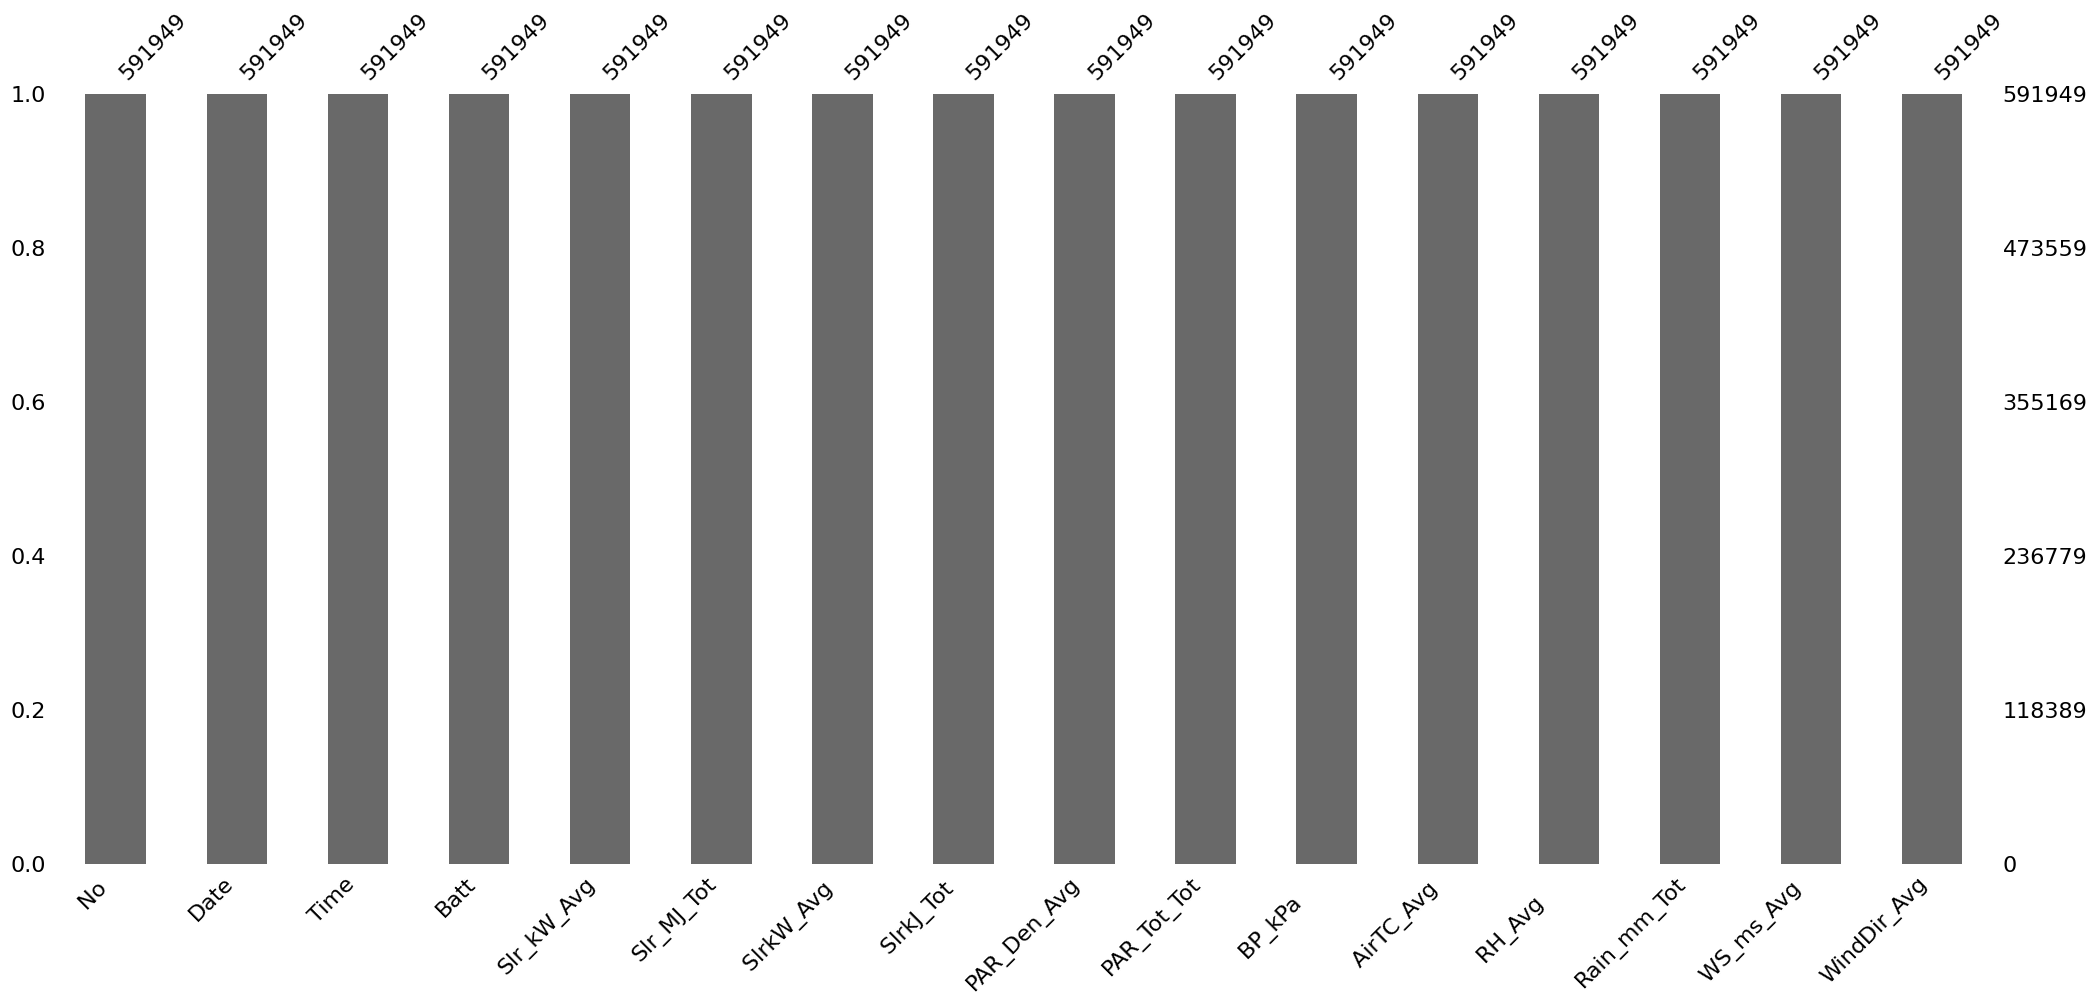

In [57]:
msno.bar(df_new)
plt.show()

In [58]:
df_new = pd.concat([df[cat_cols], df_new.drop(cat_cols, axis = 1)], axis = 1)
df_new.head()

,Time,Batt,Slr_kW_Avg,Slr_MJ_Tot,SlrkW_Avg,SlrkJ_Tot,PAR_Den_Avg,PAR_Tot_Tot,BP_kPa,AirTC_Avg,RH_Avg,Rain_mm_Tot,WS_ms_Avg,WindDir_Avg,No,Date
0,20:00:00,13.02,0,0.000052,0,0,-0.003,-0.000906,NAN,31.03,47.24,0,3.013,261.2,1,2012-06-22
1,20:15:00,13.05,0,0.000146,0,0,-0.003,-0.00248,NAN,30.8,48.12,0,2.982,259.8,2,2012-06-22
2,20:30:00,13.06,0,0.000134,0,0,-0.003,-0.002452,NAN,30.54,50.23,0,1.848,264.9,3,2012-06-22
3,20:45:00,13.06,0,0.00014,0,0,-0.003,-0.00248,NAN,30.54,51.22,0,1.416,259.8,4,2012-06-22
4,21:00:00,13.05,0,0.000128,0,0,-0.003,-0.002494,NAN,30.35,51.5,0,1.161,263.8,5,2012-06-22


In [59]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591949 entries, 0 to 591948
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Time         591949 non-null  object        
 1   Batt         591949 non-null  object        
 2   Slr_kW_Avg   591949 non-null  object        
 3   Slr_MJ_Tot   591949 non-null  object        
 4   SlrkW_Avg    591949 non-null  object        
 5   SlrkJ_Tot    591949 non-null  object        
 6   PAR_Den_Avg  591949 non-null  object        
 7   PAR_Tot_Tot  591949 non-null  object        
 8   BP_kPa       591949 non-null  object        
 9   AirTC_Avg    591949 non-null  object        
 10  RH_Avg       591949 non-null  object        
 11  Rain_mm_Tot  591949 non-null  object        
 12  WS_ms_Avg    591949 non-null  object        
 13  WindDir_Avg  591949 non-null  object        
 14  No           591949 non-null  int64         
 15  Date         591949 non-null  date

In [60]:
df_temp = df_new.copy()

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']

for col in cat_cols:
    # Convert the column to string type before applying LabelEncoder
    df_temp[col] = df_temp[col].astype(str)
    df_temp[col] = lb.fit_transform(df_temp[col])

In [64]:
def likelihood_encoding(df, cat_cols, target_variable = "Status"):
    # cat_cols.remove(target_variable)
    df_temp = df.copy()
    for col in cat_cols:
        effect = {}
        print(col)
        for category in df[col].unique():
            print(category)

            try:
                temp = df[df[col] == category]
                lr = LogisticRegression()
                X = temp.drop(target_variable, axis = 1, inplace = False)
                y = temp[target_variable]
                # print(temp.drop(target_variable, axis = 1).isnull().sum())
                lr.fit(X, y)

                effect[category] = accuracy_score(y, lr.predict(X))
            except Exception as E:
                print(E)

        for key, value in effect.items():
            effect[key] = np.log(effect[key] / (1 - effect[key] + 1e-6))

        df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)
    return df_temp


In [66]:
df_temp.head()

,Time,Batt,Slr_kW_Avg,Slr_MJ_Tot,SlrkW_Avg,SlrkJ_Tot,PAR_Den_Avg,PAR_Tot_Tot,BP_kPa,AirTC_Avg,RH_Avg,Rain_mm_Tot,WS_ms_Avg,WindDir_Avg,No,Date
0,160,293,0,94891,0,0,2,53,31,2133,3733,0,2992,3429,1,2012-06-22
1,162,296,0,324,0,0,2,353,31,2110,3821,0,2962,3351,2,2012-06-22
2,164,297,0,243,0,0,2,348,31,2084,4073,0,1847,3466,3,2012-06-22
3,166,297,0,273,0,0,2,352,31,2084,4172,0,1415,3351,4,2012-06-22
4,168,296,0,197,0,0,2,355,31,2065,4200,0,1160,3455,5,2012-06-22


In [67]:
del df_temp

In [68]:
def target_encoding(df, cat_cols, target_variable = "Status"):

    for col in cat_cols:
        weight = 7
        feat = df.groupby(col)[target_variable].agg(["mean", "count"])
        mean = feat['mean']
        count = feat['count']

        smooth = (count * mean + weight * mean) / (weight + count)

        df.loc[:, col] = df.loc[:, col].map(smooth)

    return df

In [69]:
df_temp = df_new.copy()

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']

for col in cat_cols:
    # Convert the column to string type before applying LabelEncoder if it is not already a string
    # Convert all values to strings before using LabelEncoder
    df_temp[col] = df_temp[col].astype(str)
    df_temp[col] = lb.fit_transform(df_temp[col])

In [74]:
def target_encoding(df, cat_cols, target_variable="Time"): # Change target_variable to an existing column

    for col in cat_cols:
        weight = 7
        feat = df.groupby(col)[target_variable].agg(["mean", "count"])
        mean = feat['mean']
        count = feat['count']

        smooth = (count * mean + weight * mean) / (weight + count)

        df.loc[:, col] = df.loc[:, col].map(smooth)

    return df

In [76]:
df_temp.head()

,Time,Batt,Slr_kW_Avg,Slr_MJ_Tot,SlrkW_Avg,SlrkJ_Tot,PAR_Den_Avg,PAR_Tot_Tot,BP_kPa,AirTC_Avg,RH_Avg,Rain_mm_Tot,WS_ms_Avg,WindDir_Avg,No,Date
0,160,293,0,94891,0,0,2,53,31,2133,3733,0,2992,3429,1,2012-06-22
1,162,296,0,324,0,0,2,353,31,2110,3821,0,2962,3351,2,2012-06-22
2,164,297,0,243,0,0,2,348,31,2084,4073,0,1847,3466,3,2012-06-22
3,166,297,0,273,0,0,2,352,31,2084,4172,0,1415,3351,4,2012-06-22
4,168,296,0,197,0,0,2,355,31,2065,4200,0,1160,3455,5,2012-06-22


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [79]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature (Square footage)
y = 4 + 3 * X + np.random.randn(100, 1)

In [81]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
model = LinearRegression()
model.fit(X_train_lg, y_train_lg)


LinearRegression()

In [85]:
y_pred = model.predict(X_test_lg)

In [87]:
mse = mean_squared_error(y_test_lg, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Model Coefficients: {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}")

Mean Squared Error: 0.65
Model Coefficients: 2.80
Model Intercept: 4.14


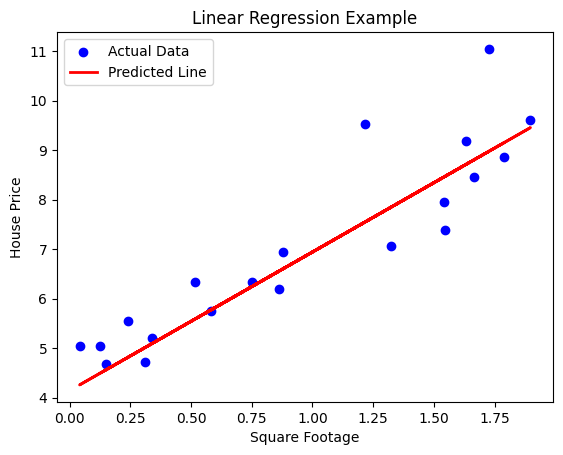

In [91]:
plt.scatter(X_test_lg, y_test_lg, color="blue", label="Actual Data")
plt.plot(X_test_lg, y_pred, color="red", linewidth=2, label="Predicted Line")
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.title("Linear Regression Example")
plt.legend()
plt.show()

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [93]:
X_logistic = np.random.rand(100, 1) * 10  # Study hours
y_logistic = (X_logistic > 5).astype(int).ravel()

In [94]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

In [95]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_lg, y_train_lg)

LogisticRegression()

In [96]:
y_pred_lg = logistic_model.predict(X_test_lg)

In [97]:
accuracy = accuracy_score(y_test_lg, y_pred_lg)
print(f"\n=== Logistic Regression Results ===")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_lg, y_pred_lg))
print("Classification Report:")
print(classification_report(y_test_lg, y_pred_lg))


=== Logistic Regression Results ===
Accuracy: 1.00
Confusion Matrix:
[[ 6  0]
 [ 0 14]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



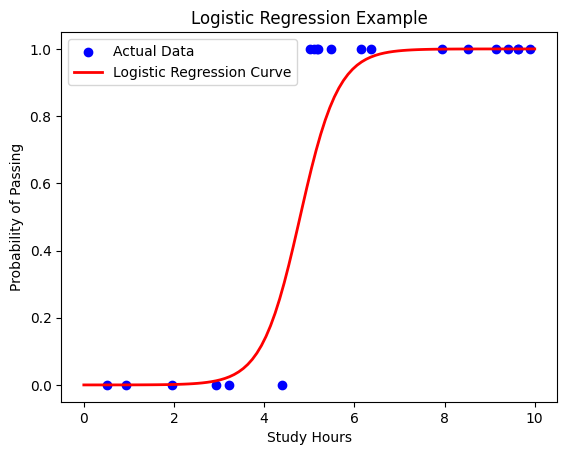

In [98]:
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
y_prob = logistic_model.predict_proba(X_range)[:, 1]  # Probability of passing

plt.scatter(X_test_lg, y_test_lg, color="blue", label="Actual Data")
plt.plot(X_range, y_prob, color="red", linewidth=2, label="Logistic Regression Curve")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression Example")
plt.legend()

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [100]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature (Square footage)
y = 4 + 3 * X + np.random.randn(100, 1)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train.ravel())


RandomForestRegressor(random_state=42)

In [103]:
y_pred = rf_regressor.predict(X_test)

In [104]:
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Regression - Mean Squared Error: {mse:.2f}")

Random Forest Regression - Mean Squared Error: 0.77


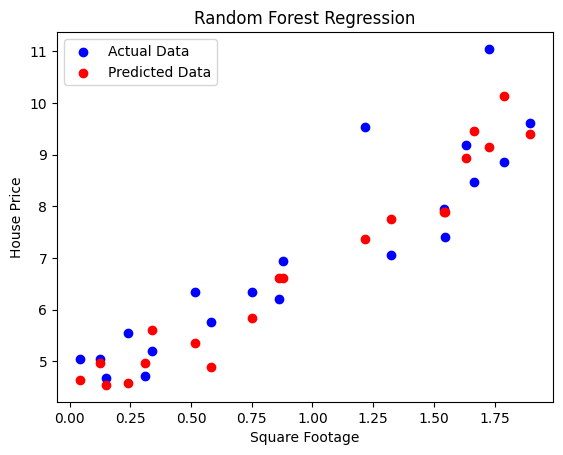

In [105]:
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.scatter(X_test, y_pred, color="red", label="Predicted Data")
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

In [106]:
import xgboost as xgb

In [107]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature (Square footage)
y = 4 + 3 * X + np.random.randn(100, 1)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
xgb_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [110]:
y_pred = xgb_regressor.predict(X_test)

In [111]:
mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost Regression - Mean Squared Error: {mse:.2f}")

XGBoost Regression - Mean Squared Error: 0.90


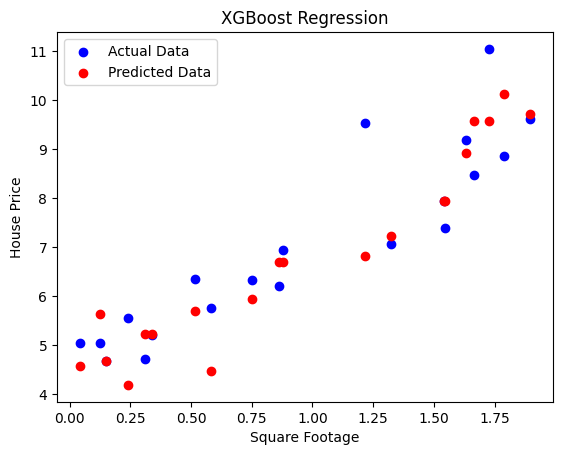

In [112]:
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.scatter(X_test, y_pred, color="red", label="Predicted Data")
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.title("XGBoost Regression")
plt.legend()
plt.show()

In [113]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [114]:
X_class = np.random.rand(100, 1) * 10  # Study hours
y_class = (X_class > 5).astype(int).ravel()

In [115]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [116]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_classifier.fit(X_train_cls, y_train_cls)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [117]:
y_pred_cls = xgb_classifier.predict(X_test_cls)

In [118]:
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f"\nXGBoost Classification - Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_cls))
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))


XGBoost Classification - Accuracy: 0.95
Confusion Matrix:
[[ 6  0]
 [ 1 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.93      0.96        14

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.94        20
weighted avg       0.96      0.95      0.95        20



In [119]:
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
y_prob = xgb_classifier.predict_proba(X_range)[:, 1]

In [121]:
!pip install pandas numpy scikit-learn optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 11.5 MB/s eta 0:00:00


In [24]:
import pandas as pd

In [26]:
# Split the data into training and testing sets
X_train_lg, X_test_lg, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_train_lg to a pandas DataFrame
X_train_lg = pd.DataFrame(X_train_lg)
X_test_lg = pd.DataFrame(X_test_lg)

# Now you can use select_dtypes
numerical_features = X_train_lg.select_dtypes(include=['number']).columns
categorical_features = X_train_lg.select_dtypes(include=['object']).columns



In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler # Importing StandardScaler

param_grid = {
    'fit_intercept': [True, False]
}

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_lg)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test_lg)

grid = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)

mse_grid = mean_squared_error(y_test, grid.predict(X_test_scaled))
print("Grid Search Best Params:", grid.best_params_)
print("Test MSE (Grid Search):", mse_grid)

Grid Search Best Params: {'fit_intercept': True}
Test MSE (Grid Search): 0.9296073127736799


In [31]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'fit_intercept': [True, False]
}

random = RandomizedSearchCV(LinearRegression(), param_distributions=param_dist, n_iter=2, cv=5, scoring='neg_mean_squared_error', random_state=42)
random.fit(X_train_scaled, y_train)

mse_random = mean_squared_error(y_test, random.predict(X_test_scaled))
print("Random Search Best Params:", random.best_params_)
print("Test MSE (Random Search):", mse_random)

Random Search Best Params: {'fit_intercept': True}
Test MSE (Random Search): 0.9296073127736799


In [11]:
from sklearn.model_selection import train_test_split

In [15]:
import optuna
from sklearn.model_selection import cross_val_score, train_test_split  # Importing train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np  # Importing numpy
from sklearn.metrics import mean_squared_error # Importing mean_squared_error


# Assuming you have X and y defined somewhere before this
# For example, X could be your feature data and y could be your target variable data
# X, y = load_your_data()

# Creating sample data for X and y if not loaded
X = 2 * np.random.rand(100, 1)  # Feature (Square footage)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets (if not already done)
# from sklearn.model_selection import train_test_split  # No longer needed here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def objective(trial):
    fit_intercept = trial.suggest_categorical("fit_intercept", [True, False])
    model = LinearRegression(fit_intercept=fit_intercept)
    score = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    return -score.mean()


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=5)

# Best model training
best_params = study.best_params
model_bayes = LinearRegression(**best_params)
# Assuming X_train_scaled and X_test_scaled are defined (if scaling is needed)
# If not, use X_train and X_test directly
model_bayes.fit(X_train, y_train)
mse_bayes = mean_squared_error(y_test, model_bayes.predict(X_test))

print("Bayesian Optimization Best Params:", best_params)
print("Test MSE (Bayesian Optimization):", mse_bayes)


[I 2025-04-05 10:24:08,953] A new study created in memory with name: no-name-4143a7de-f3c9-4931-9d3f-aa546a5879fe
[I 2025-04-05 10:24:08,971] Trial 0 finished with value: 0.9103358812681153 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 0.9103358812681153.
[I 2025-04-05 10:24:08,984] Trial 1 finished with value: 0.9103358812681153 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 0.9103358812681153.
[I 2025-04-05 10:24:08,996] Trial 2 finished with value: 5.973046577965714 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.9103358812681153.
[I 2025-04-05 10:24:09,010] Trial 3 finished with value: 5.973046577965714 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.9103358812681153.
[I 2025-04-05 10:24:09,024] Trial 4 finished with value: 0.9103358812681153 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 0.9103358812681153.


Bayesian Optimization Best Params: {'fit_intercept': True}
Test MSE (Bayesian Optimization): 0.9296073127736794


In [32]:
results = pd.DataFrame({
    'Method': ['Grid Search', 'Random Search', 'Bayesian Optimization'],
    'Best Params': [
        grid.best_params_,
        random.best_params_,
        best_params
    ],
    'Test MSE': [
        mse_grid,
        mse_random,
        mse_bayes
    ]
})

results

,Method,Best Params,Test MSE
0,Grid Search,{'fit_intercept': True},0.929607
1,Random Search,{'fit_intercept': True},0.929607
2,Bayesian Optimization,{'fit_intercept': True},0.929607


In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return acc


In [35]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Supports both l1 and l2
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best Parameters (Grid Search):", grid.best_params_)
grid_acc = evaluate(grid.best_estimator_, X_test_scaled, y_test)


Best Parameters (Grid Search): {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [36]:

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

random_search = RandomizedSearchCV(LogisticRegression(max_iter=1000), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best Parameters (Random Search):", random_search.best_params_)
random_acc = evaluate(random_search.best_estimator_, X_test_scaled, y_test)


Best Parameters (Random Search): {'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(0.615848211066026)}
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [37]:

import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    c = trial.suggest_loguniform('C', 1e-4, 1e4)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])

    # 'liblinear' supports both l1 and l2
    model = LogisticRegression(C=c, penalty=penalty, solver='liblinear', max_iter=1000)
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
print("Best Parameters (Bayesian):", best_params)

best_model = LogisticRegression(**best_params, solver='liblinear', max_iter=1000)
best_model.fit(X_train_scaled, y_train)
bayes_acc = evaluate(best_model, X_test_scaled, y_test)


[I 2025-04-05 10:33:58,896] A new study created in memory with name: no-name-2c0d3e04-f914-4c70-a67a-d125a83bce63
<ipython-input-37-8e438f154745>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c = trial.suggest_loguniform('C', 1e-4, 1e4)
[I 2025-04-05 10:33:58,948] Trial 0 finished with value: 0.9670329670329672 and parameters: {'C': 38.05846653909887, 'penalty': 'l2'}. Best is trial 0 with value: 0.9670329670329672.
<ipython-input-37-8e438f154745>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c = trial.suggest_loguniform('C', 1e-4, 1e4)
[I 2025-04-05 10:33:59,060] Trial 1 finished with value: 0.9626373626373625 and parameters: {'C': 14.231377337254271, 'penalty': 

Best Parameters (Bayesian): {'C': 0.2653424108564922, 'penalty': 'l2'}
Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [47]:

results = pd.DataFrame({
    'Method': ['Grid Search', 'Random Search', 'Bayesian Optuna'],
    'Best Accuracy': [grid_acc, random_acc, bayes_acc]
})

results


,Method,Best Accuracy
0,Grid Search,0.991228
1,Random Search,0.973684
2,Bayesian Optuna,0.991228


In [44]:

from sklearn.metrics import mean_squared_error, accuracy_score

def evaluate_regression(model, X, y):
    pred = model.predict(X)
    mse = mean_squared_error(y, pred)
    return mse

def evaluate_classification(model, X, y):
    pred = model.predict(X)
    acc = accuracy_score(y, pred)
    return acc


In [48]:
from sklearn.metrics import mean_squared_error, accuracy_score

def evaluate_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

def evaluate_classification(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [50]:

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train_scaled, y_train)

# Best parameters and performance
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
mse = evaluate_regression(best_model, X_test_scaled, y_test)

print("Best Parameters:", best_params)
print("Test MSE:", mse)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Test MSE: 0.03609646111726761


In [51]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

# Define parameter distribution
param_dist = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': np.arange(3, 10, 2),
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'subsample': np.linspace(0.7, 1.0, 4)
}

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize Random Search
random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit Random Search
random_search.fit(X_train_scaled, y_train)

# Best parameters and performance
best_params = random_search.best_params_
best_model = random_search.best_estimator_
mse = evaluate_regression(best_model, X_test_scaled, y_test)

print("Best Parameters:", best_params)
print("Test MSE:", mse)


Best Parameters: {'subsample': np.float64(0.7999999999999999), 'n_estimators': np.int64(400), 'max_depth': np.int64(3), 'learning_rate': np.float64(0.0575)}
Test MSE: 0.03686247393488884


In [52]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10, step=2),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, step=0.05),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0, step=0.1),
        'objective': 'reg:squarederror',
        'random_state': 42
    }
    model = xgb.XGBRegressor(**params)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    return -scores.mean()

# Create study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

# Best parameters and performance
best_params = study.best_params
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train_scaled, y_train)
mse = evaluate_regression(best_model, X_test_scaled, y_test)

print("Best Parameters:", best_params)
print("Test MSE:", mse)


[I 2025-04-05 10:49:46,590] A new study created in memory with name: no-name-859a35dd-eeeb-4ae8-a245-092f364931fd
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [3, 10] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.01, 0.2] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 0.16].
  warnings.warn(
[I 2025-04-05 10:49:58,832] Trial 0 finished with value: 0.04729838073253632 and parameters: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.060000000000000005, 'subsample': 1.0}. Best is trial 0 with value: 0.04729838073253632.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [3, 10] and step=2, but the range is not divisible by `step`. It will 

Best Parameters: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.060000000000000005, 'subsample': 0.7}
Test MSE: 0.030998775735497475


In [57]:
# Convert X to a pandas DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)



In [62]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification  # Import make_classification

# ... (rest of your imports)

# Generate data if X_class and y_class are not defined
X_class, y_class = make_classification(n_samples=100, n_features=20, random_state=42)

# Now you can proceed with your train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [65]:
from sklearn.neural_network import MLPRegressor # Import MLPRegressor from sklearn.neural_network

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(MLPRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Params:", grid_search.best_params_)

Best Params: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [66]:

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-5, 5, 10),
    'learning_rate': ['constant', 'adaptive']
}

random_search = RandomizedSearchCV(MLPRegressor(random_state=42), param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best Params:", random_search.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Params: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': np.float64(0.2782559402207126), 'activation': 'tanh'}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:

import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (100, 50)])
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
    learning_rate_init = trial.suggest_loguniform('learning_rate_init', 1e-4, 1e-1)

    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                         alpha=alpha,
                         learning_rate_init=learning_rate_init,
                         max_iter=500,
                         random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=3).mean()
    return -score

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

best_params = study.best_params
model = MLPRegressor(**best_params, max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

print("Best Params from Optuna:", best_params)


[I 2025-04-05 11:03:52,286] A new study created in memory with name: no-name-037b9ab1-2202-482a-a921-e82cd537b6d9
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
<ipython-input-67-90e970f4e984>:7: FutureWarning: suggest_loguniform has been deprecated 

Best Params from Optuna: {'hidden_layer_sizes': (100,), 'alpha': 0.00011732270188669186, 'learning_rate_init': 0.012079595864774861}
